In [156]:
import numpy as np
import pandas as pd

df=pd.read_csv("spam.csv", encoding =('ISO-8859-1'), low_memory =False)

In [157]:
df.sample(3)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
5232,spam,YOU ARE CHOSEN TO RECEIVE A å£350 AWARD! Pls c...,NaN,NaN,NaN
2423,ham,Lmao but its so fun...,NaN,NaN,NaN
789,ham,Gud mrng dear hav a nice day,NaN,NaN,NaN


In [158]:
df.sample(6)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
1651,ham,I wan but too early lei... Me outside now wun ...,NaN,NaN,NaN
2855,ham,"Japanese Proverb: If one Can do it, U too Can ...",NaN,NaN,NaN
590,spam,For ur chance to win a å£250 wkly shopping spr...,NaN,NaN,NaN
1606,ham,Ok no prob... I'll come after lunch then...,NaN,NaN,NaN
4660,ham,Ok no prob...,NaN,NaN,NaN
4779,ham,Sen told that he is going to join his uncle fi...,NaN,NaN,NaN


In [159]:
df=df.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1)

In [160]:
df=df.rename(columns={'v1':'true_value','v2':'msg'})

In [161]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()


In [162]:
df['true_value']=encoder.fit_transform(df['true_value'])

In [163]:
df.isnull().sum()

true_value    0
msg           0
dtype: int64

In [164]:
df.duplicated().sum()

403

In [165]:
df=df.drop_duplicates(keep='first')

2nd

In [166]:
df['true_value'].value_counts()

0    4516
1     653
Name: true_value, dtype: int64

In [167]:
df.sample(3)

,true_value,msg
695,0,Good. Good job. I like entrepreneurs
3207,0,Oops my phone died and I didn't even know. Yea...
3896,0,No. Thank you. You've been wonderful


In [168]:
import nltk

In [169]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /home/sahil/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [170]:
df['msg_char']=df['msg'].apply(len)

In [171]:
df['msg_words']=df['msg'].apply(lambda x:len(nltk.word_tokenize(x)))

In [172]:
df['msg_sentences']=df['msg'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [173]:
df[df['true_value']==0][['msg_sentences','msg_words','msg_char']].describe()


,msg_sentences,msg_words,msg_char
count,4516.000000,4516.000000,4516.000000
mean,1.799601,17.120903,70.459256
std,1.278465,13.493725,56.358207
min,1.000000,1.000000,2.000000
25%,1.000000,8.000000,34.000000
50%,1.000000,13.000000,52.000000
75%,2.000000,22.000000,90.000000
max,28.000000,220.000000,910.000000


In [174]:
df[df['true_value']==1][['msg_sentences','msg_words','msg_char']].describe()

,msg_sentences,msg_words,msg_char
count,653.000000,653.000000,653.000000
mean,2.967841,27.667688,137.891271
std,1.483201,7.008418,30.137753
min,1.000000,2.000000,13.000000
25%,2.000000,25.000000,132.000000
50%,3.000000,29.000000,149.000000
75%,4.000000,32.000000,157.000000
max,8.000000,46.000000,224.000000


<Axes: xlabel='msg_words', ylabel='Count'>

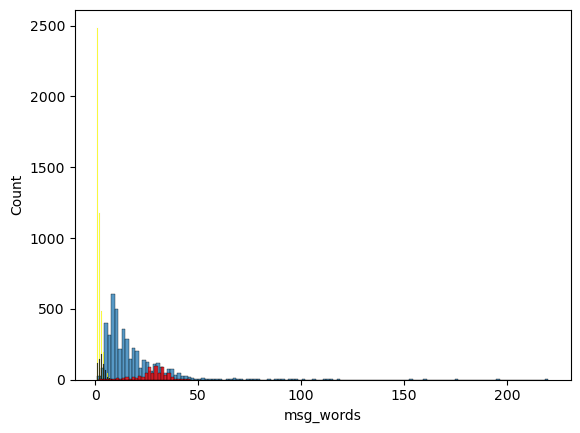

In [175]:
import seaborn as  sns

sns.histplot(df[df['true_value']==0]['msg_words'])
sns.histplot(df[df['true_value']==0]['msg_sentences'],color='yellow')
sns.histplot(df[df['true_value']==1]['msg_sentences'],color='black')
sns.histplot(df[df['true_value']==1]['msg_words'],color='red')

/tmp/ipykernel_13369/4277794465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

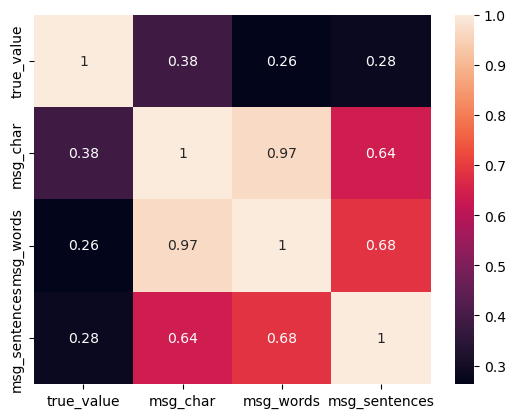

In [176]:
sns.heatmap(df.corr(),annot=True)

3rd

In [177]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /home/sahil/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [178]:
from nltk.corpus import stopwords
import string
from nltk.stem.porter import PorterStemmer
ps =PorterStemmer()


In [179]:

def sms_transform(text):
    text=text.lower()
    text=nltk.word_tokenize(text)
    y=[]
    for i in text:
        if i.isalnum() and i not in stopwords.words('english') and i not in string.punctuation:
            y.append(ps.stem(i))

    return ' '.join(y)
    

sms_transform(df["msg"][10])

'gon na home soon want talk stuff anymor tonight k cri enough today'

In [180]:
df['updated_msg']=df['msg'].apply(sms_transform)
df.head()

,true_value,msg,msg_char,msg_words,msg_sentences,updated_msg
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [181]:
from sklearn.feature_extraction.text import CountVectorizer
cv= CountVectorizer()
X=cv.fit_transform(df['updated_msg'])

In [182]:
y=df['true_value'].values

In [183]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)
X = tfidf.fit_transform(df['updated_msg']).toarray()

In [184]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [185]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [186]:
bnb=BernoulliNB()

In [187]:
bnb.fit(x_train,y_train)
y_pred1=bnb.predict(x_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


In [189]:
transformed_sms = sms_transform(input("enter the msg that u want to check"))
vector_input = tfidf.transform([transformed_sms])
result = bnb.predict(vector_input)[0]
if result == 1:
    print("Spam")
elif result==0:
    print("Not Spam")

Spam
